In [1]:
# Accedo a Google Drive
from google.colab import drive
drive.mount(r'/content/drive')

# Importo librerías que vamos a usar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Accedo a la PWT. En este caso, yo la tengo cargada en mi drive :)
file_path = '/content/drive/MyDrive/Colab Notebooks/economic-growth/pwt1001.xlsx' # Modificar el path según sea necesario
pwt = pd.read_excel(file_path, sheet_name="Data") # Poner el nombre de la hoja tal cual. Con esto armamos un dataframe

Mounted at /content/drive


In [14]:
greece = pwt[pwt["country"] == "Greece"].copy()
greece.set_index("year", inplace=True)

In [15]:
# Estimo el valor del coeficiente de Euler
greece['euler']= np.log(greece['rconna']) #revisar que este sea el logaritmo real (natural o base 10)
print(greece['euler'].mean())

11.832410799143451


In [16]:
# Estimo el nivel de ahorro
greece['s_ramsey']= 1/greece['euler']
print(greece['s_ramsey'].mean())

0.08481564109282336


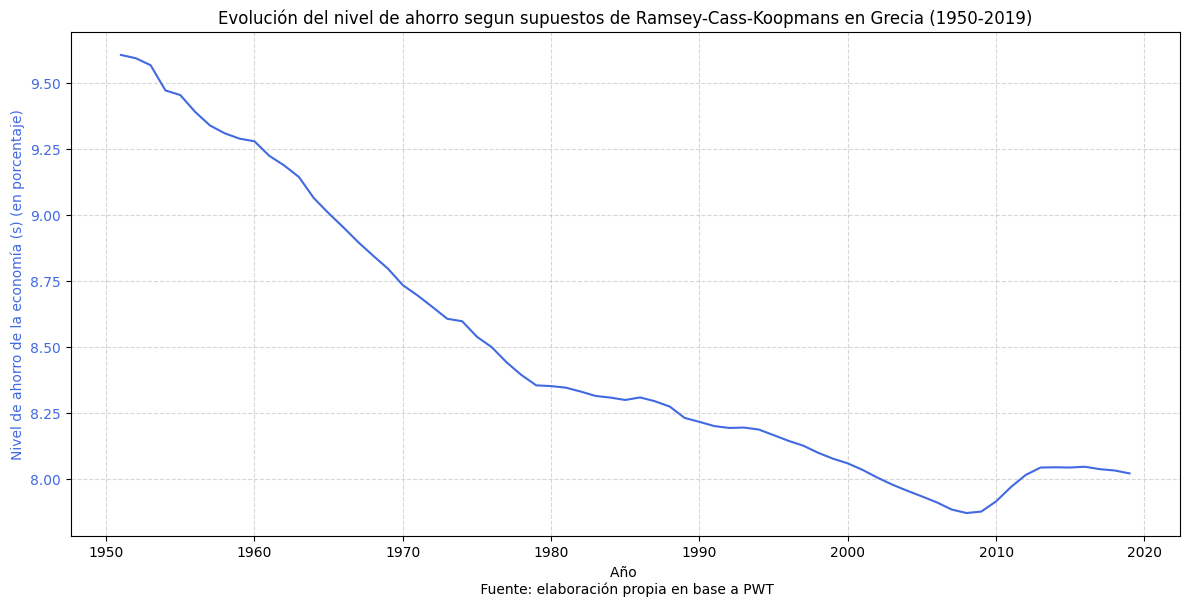

In [22]:
# Grafico la evolución del nivel de ahorro
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.plot(greece.index, (greece['s_ramsey']*100), label="Nivel de ahorro de la economía", color="royalblue")
ax1.set_xlabel("Año")
ax1.set_ylabel("Nivel de ahorro de la economía (s) (en porcentaje)", color="royalblue") # El color puede ser modificado según necesario!
ax1.tick_params(axis="y", labelcolor="royalblue")

# Título y referencia
plt.title("Evolución del nivel de ahorro segun supuestos de Ramsey-Cass-Koopmans en Grecia (1950-2019)")
fig.tight_layout()
plt.grid(True, linestyle="--", alpha=0.5)
ax1.set_xlabel('Año \n Fuente: elaboración propia en base a PWT') # Para aclaraciones, referencias, etc.
plt.show() # Nos muestra cómo quedó el gráfico